In [158]:
import yfinance as yf
import warnings
import matplotlib.pyplot as plt
import mplfinance as mpf
warnings.filterwarnings("ignore")   # Ignore all warnings

[*********************100%%**********************]  1 of 1 completed


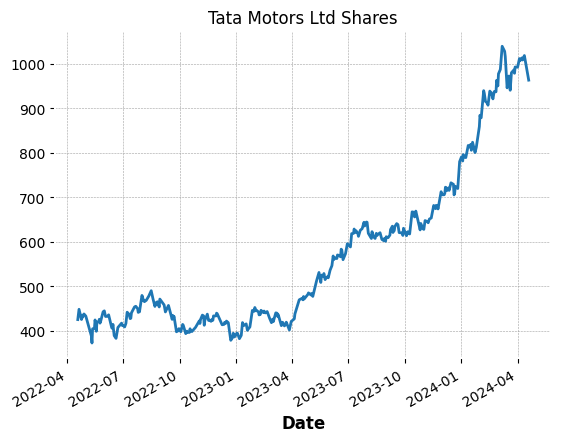

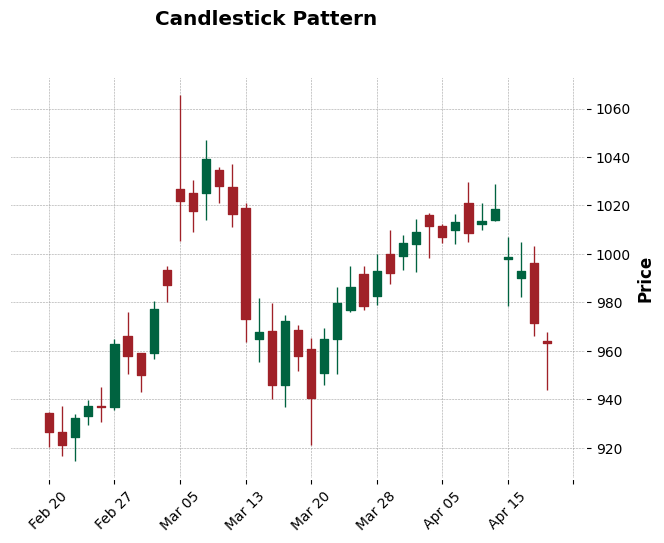

In [159]:
recent_data = yf.download("TATAMOTORS.NS", period="2y",interval="1d")   #month: mo
recent_data['Close'].plot()
plt.title("Tata Motors Ltd Shares")
plt.show()
# Plot candlestick patterns using mplfinance for a sample time period
mpf.plot(recent_data.loc['2024-02-20':'2024-04-20'], type='candle', style='charles', title='Candlestick Pattern')

In [160]:
print(recent_data.columns)
print(recent_data.head())
recent_data.drop('Adj Close', axis=1, inplace=True)
print(recent_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-04-19  436.750000  440.250000  417.000000  424.950012  423.629700   
2022-04-20  431.000000  441.700012  428.250000  440.549988  439.181183   
2022-04-21  444.500000  449.350006  441.049988  448.049988  446.657898   
2022-04-22  442.049988  447.250000  438.000000  438.850006  437.486481   
2022-04-25  432.750000  436.000000  423.149994  425.149994  423.829041   

              Volume  
Date                  
2022-04-19  12669041  
2022-04-20  19639290  
2022-04-21  14124872  
2022-04-22  14362036  
2022-04-25  14729009  
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [161]:
print(recent_data)

                   Open         High          Low        Close    Volume
Date                                                                    
2022-04-19   436.750000   440.250000   417.000000   424.950012  12669041
2022-04-20   431.000000   441.700012   428.250000   440.549988  19639290
2022-04-21   444.500000   449.350006   441.049988   448.049988  14124872
2022-04-22   442.049988   447.250000   438.000000   438.850006  14362036
2022-04-25   432.750000   436.000000   423.149994   425.149994  14729009
...                 ...          ...          ...          ...       ...
2024-04-12  1014.000000  1029.000000  1013.500000  1018.500000  11575194
2024-04-15   998.099976  1006.950012   978.500000   998.799988  12632409
2024-04-16   990.000000  1004.900024   982.099976   992.799988   9574762
2024-04-18   996.349976  1003.099976   966.250000   971.349976  13540490
2024-04-19   964.000000   967.950012   944.000000   963.200012  15381310

[495 rows x 5 columns]


important functions 

In [162]:
import pandas as pd
import numpy as np

# Assume 'stock_data' DataFrame contains open, high, low, close, and volume prices

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate short-term and long-term EMAs
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()  # EMA will give more weightage to the recent price
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    macd_line = short_ema - long_ema

    # Calculate signal line
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD histogram
    macd_histogram = macd_line - signal_line

    return macd_line, signal_line, macd_histogram

def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_stochastic_oscillator(data, window=14):
    low_min = data['Low'].rolling(window=window).min()
    high_max = data['High'].rolling(window=window).max()
    stochastic_k = ((data['Close'] - low_min) / (high_max - low_min)) * 100
    stochastic_d = stochastic_k.rolling(window=3).mean()  # 3-day smoothing for %D line
    return stochastic_k, stochastic_d

def calculate_moving_averages(data, short_window=50, long_window=200):
    # Calculate short-term and long-term moving averages
    short_ma = data['Close'].rolling(window=short_window).mean()
    long_ma = data['Close'].rolling(window=long_window).mean()
    return short_ma, long_ma

def calculate_volume_indicators(data, window=20):
    # Calculate volume moving average
    volume_ma = data['Volume'].rolling(window=window).mean()
    # Calculate volume rate of change
    volume_roc = data['Volume'].pct_change(window)
    return volume_ma, volume_roc

def calculate_volatility_indicators(data, window=20):
    # Calculate Bollinger Bands
    std_dev = data['Close'].rolling(window=window).std()
    upper_band = data['Close'].rolling(window=window).mean() + 2 * std_dev
    lower_band = data['Close'].rolling(window=window).mean() - 2 * std_dev
    # Calculate Average True Range (ATR)
    high_low_range = data['High'] - data['Low']
    true_range = np.maximum(np.maximum((data['High'] - data['Low']).abs(), (data['High'] - data['Close'].shift()).abs()), (data['Low'] - data['Close'].shift()).abs())
    atr = true_range.rolling(window=window).mean()
    b = (data['Close']-lower_band)/(upper_band-lower_band)
    return upper_band, lower_band, atr , b

def williams_percent_r(data, period=14):
    high = data['High']
    low = data['Low']
    close = data['Close']

    # Calculate %R
    lowest_low = low.rolling(window=period).min()
    highest_high = high.rolling(window=period).max()
    percent_r = -100 * (highest_high - close) / (highest_high - lowest_low)

    return percent_r

# Calculate technical indicators
macd_line, signal_line, macd_histogram = calculate_macd(recent_data)
rsi = calculate_rsi(recent_data)
stochastic_k, stochastic_d = calculate_stochastic_oscillator(recent_data)
short_ma, long_ma = calculate_moving_averages(recent_data)
volume_ma, volume_roc = calculate_volume_indicators(recent_data)
upper_band, lower_band, atr, b = calculate_volatility_indicators(recent_data)

# Add calculated indicators to the DataFrame
recent_data['MACD_Line'] = macd_line
recent_data['Signal_Line'] = signal_line
recent_data['MACD_Histogram'] = macd_histogram
recent_data['RSI'] = rsi
recent_data['%K'] = stochastic_k
recent_data['%D'] = stochastic_d
recent_data['Short_MA'] = short_ma
recent_data['Long_MA'] = long_ma
recent_data['Volume_MA'] = volume_ma
recent_data['Volume_ROC'] = volume_roc
recent_data['Upper_Band'] = upper_band
recent_data['Lower_Band'] = lower_band
recent_data['ATR'] = atr
recent_data['%B'] = b
recent_data['%R']=williams_percent_r(recent_data)

# Print the DataFrame with calculated indicators
print(recent_data.shape[0])


495


In [163]:
nan_percentage = (recent_data.isna().sum() / len(recent_data)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage)


Percentage of NaN values in each column:
Open               0.000000
High               0.000000
Low                0.000000
Close              0.000000
Volume             0.000000
MACD_Line          0.000000
Signal_Line        0.000000
MACD_Histogram     0.000000
RSI                2.626263
%K                 2.626263
%D                 3.030303
Short_MA           9.898990
Long_MA           40.202020
Volume_MA          3.838384
Volume_ROC         4.040404
Upper_Band         3.838384
Lower_Band         3.838384
ATR                4.040404
%B                 3.838384
%R                 2.626263
dtype: float64


In [164]:
# Drop rows where 'Long_MA' column has NaN values
recent_data= recent_data.dropna(subset=['Long_MA'])

# Calculate the percentage of NaN values in each column
nan_percentage = (recent_data.isna().sum() / len(recent_data)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage)


Percentage of NaN values in each column:
Open              0.0
High              0.0
Low               0.0
Close             0.0
Volume            0.0
MACD_Line         0.0
Signal_Line       0.0
MACD_Histogram    0.0
RSI               0.0
%K                0.0
%D                0.0
Short_MA          0.0
Long_MA           0.0
Volume_MA         0.0
Volume_ROC        0.0
Upper_Band        0.0
Lower_Band        0.0
ATR               0.0
%B                0.0
%R                0.0
dtype: float64


In [165]:
print(recent_data.shape[0])

296


candlestick 

In [166]:
from candlestick import candlestick
import pandas as pd

data = recent_data.copy()
data.reset_index(inplace=True)

data['Date'] = pd.to_datetime(data['Date'])
# data['Datetime'] = pd.to_datetime(data['Datetime'])

# candles_df = data[['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume']]
candles_df = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

candles_df.columns = ['T', 'open', 'high', 'low', 'close', 'volume']

# Defining the list of candlestick patterns you want to detect
patterns = {
    "inverted_hammer": 'InvertedHammer',
    'doji_star':'DojiStar',
    'bearish_harami':'BearishHarami',
    'bullish_harami':'BullishHarami',
    'dark_cloud_cover':'DarkCloudCover',
    'doji':'Doji',
    'dragonfly_doji':'DragonflyDoji',
    'bearish_engulfing':'BearishEngulfing',
    'bullish_engulfing':'BullishEngulfing',
    'hammer':'Hammer',
    'morning_star':'MorningStar',
    'morning_star_doji':'MorningStarDoji',
    'piercing_pattern':'PiercingPattern',
    'rain_drop':'RainDrop',
    'rain_drop_doji':'RainDropDoji',
    'star':'Star',
    'shooting_star':'ShootingStar',
    'hanging_man':"HangingMan",
    'gravestone_doji':"GravestoneDoji"
}

for pattern, target in patterns.items():
    # Apply the candlestick pattern
    candles_df = getattr(candlestick, pattern)(candles_df, target=target)

detected_patterns = []

for index, row in candles_df.iterrows():
    pattern_detected = "None"
    for pattern, detected in row[6:].items():
        if detected:
            pattern_detected = pattern
            break
    detected_patterns.append(pattern_detected)

candles_df['pattern'] = detected_patterns

for pattern in patterns.values():
    candles_df.drop(pattern, axis=1, inplace=True)

# Create a dictionary mapping dates to candlestick patterns from candles_df
pattern_dict = dict(zip(candles_df['T'], candles_df['pattern']))

# Add a new column 'pattern' to recent_data and fill it with NaN values initially
recent_data['pattern'] = "None"

for index, row in recent_data.iterrows():
    date_index = row.name  # Get the index of the row
    # Check if the date index exists in pattern_dict
    if date_index in pattern_dict:
        recent_data.at[date_index, 'pattern'] = pattern_dict[date_index]

print(recent_data)
print(recent_data.shape[0])



                   Open         High          Low        Close    Volume  \
Date                                                                       
2023-02-02   446.750000   449.200012   440.700012   444.799988  11344554   
2023-02-03   447.000000   450.799988   442.350006   445.450012  13067403   
2023-02-06   444.450012   447.000000   439.549988   442.000000   6795084   
2023-02-07   441.700012   443.399994   432.899994   435.450012   9023645   
2023-02-08   435.450012   441.000000   431.549988   440.100006   8668267   
...                 ...          ...          ...          ...       ...   
2024-04-12  1014.000000  1029.000000  1013.500000  1018.500000  11575194   
2024-04-15   998.099976  1006.950012   978.500000   998.799988  12632409   
2024-04-16   990.000000  1004.900024   982.099976   992.799988   9574762   
2024-04-18   996.349976  1003.099976   966.250000   971.349976  13540490   
2024-04-19   964.000000   967.950012   944.000000   963.200012  15381310   

           

target (labels)

In [167]:

recent_data['Price_Move_1'] = np.where(recent_data['Close'] > recent_data['Open'], 1, -1)

recent_data['Next_5_Days_Avg_Diff'] = recent_data['Close'].rolling(window=5).mean().shift(-5) - recent_data['Close']

recent_data.dropna(subset=['Next_5_Days_Avg_Diff'], inplace=True)

recent_data['Price_Move'] = np.where(recent_data['Next_5_Days_Avg_Diff'] > 0, 1, -1)

# Determine buy/sell signals
recent_data['Signal'] =0
recent_data.loc[(recent_data['%K'] > recent_data['%D']) , 'Signal'] = 1  # Buy signal
recent_data.loc[(recent_data['%K'] < recent_data['%D']) , 'Signal'] = -1  # Sell signal

print(recent_data)


                   Open         High          Low        Close    Volume  \
Date                                                                       
2023-02-02   446.750000   449.200012   440.700012   444.799988  11344554   
2023-02-03   447.000000   450.799988   442.350006   445.450012  13067403   
2023-02-06   444.450012   447.000000   439.549988   442.000000   6795084   
2023-02-07   441.700012   443.399994   432.899994   435.450012   9023645   
2023-02-08   435.450012   441.000000   431.549988   440.100006   8668267   
...                 ...          ...          ...          ...       ...   
2024-04-04  1016.000000  1017.000000   998.150024  1011.599976   9138276   
2024-04-05  1011.599976  1012.500000  1004.400024  1007.099976   4519120   
2024-04-08  1010.049988  1016.400024  1004.000000  1013.200012   5188052   
2024-04-09  1021.000000  1029.500000  1005.000000  1008.500000   8539041   
2024-04-10  1012.250000  1021.000000  1010.000000  1013.500000   4554077   

           

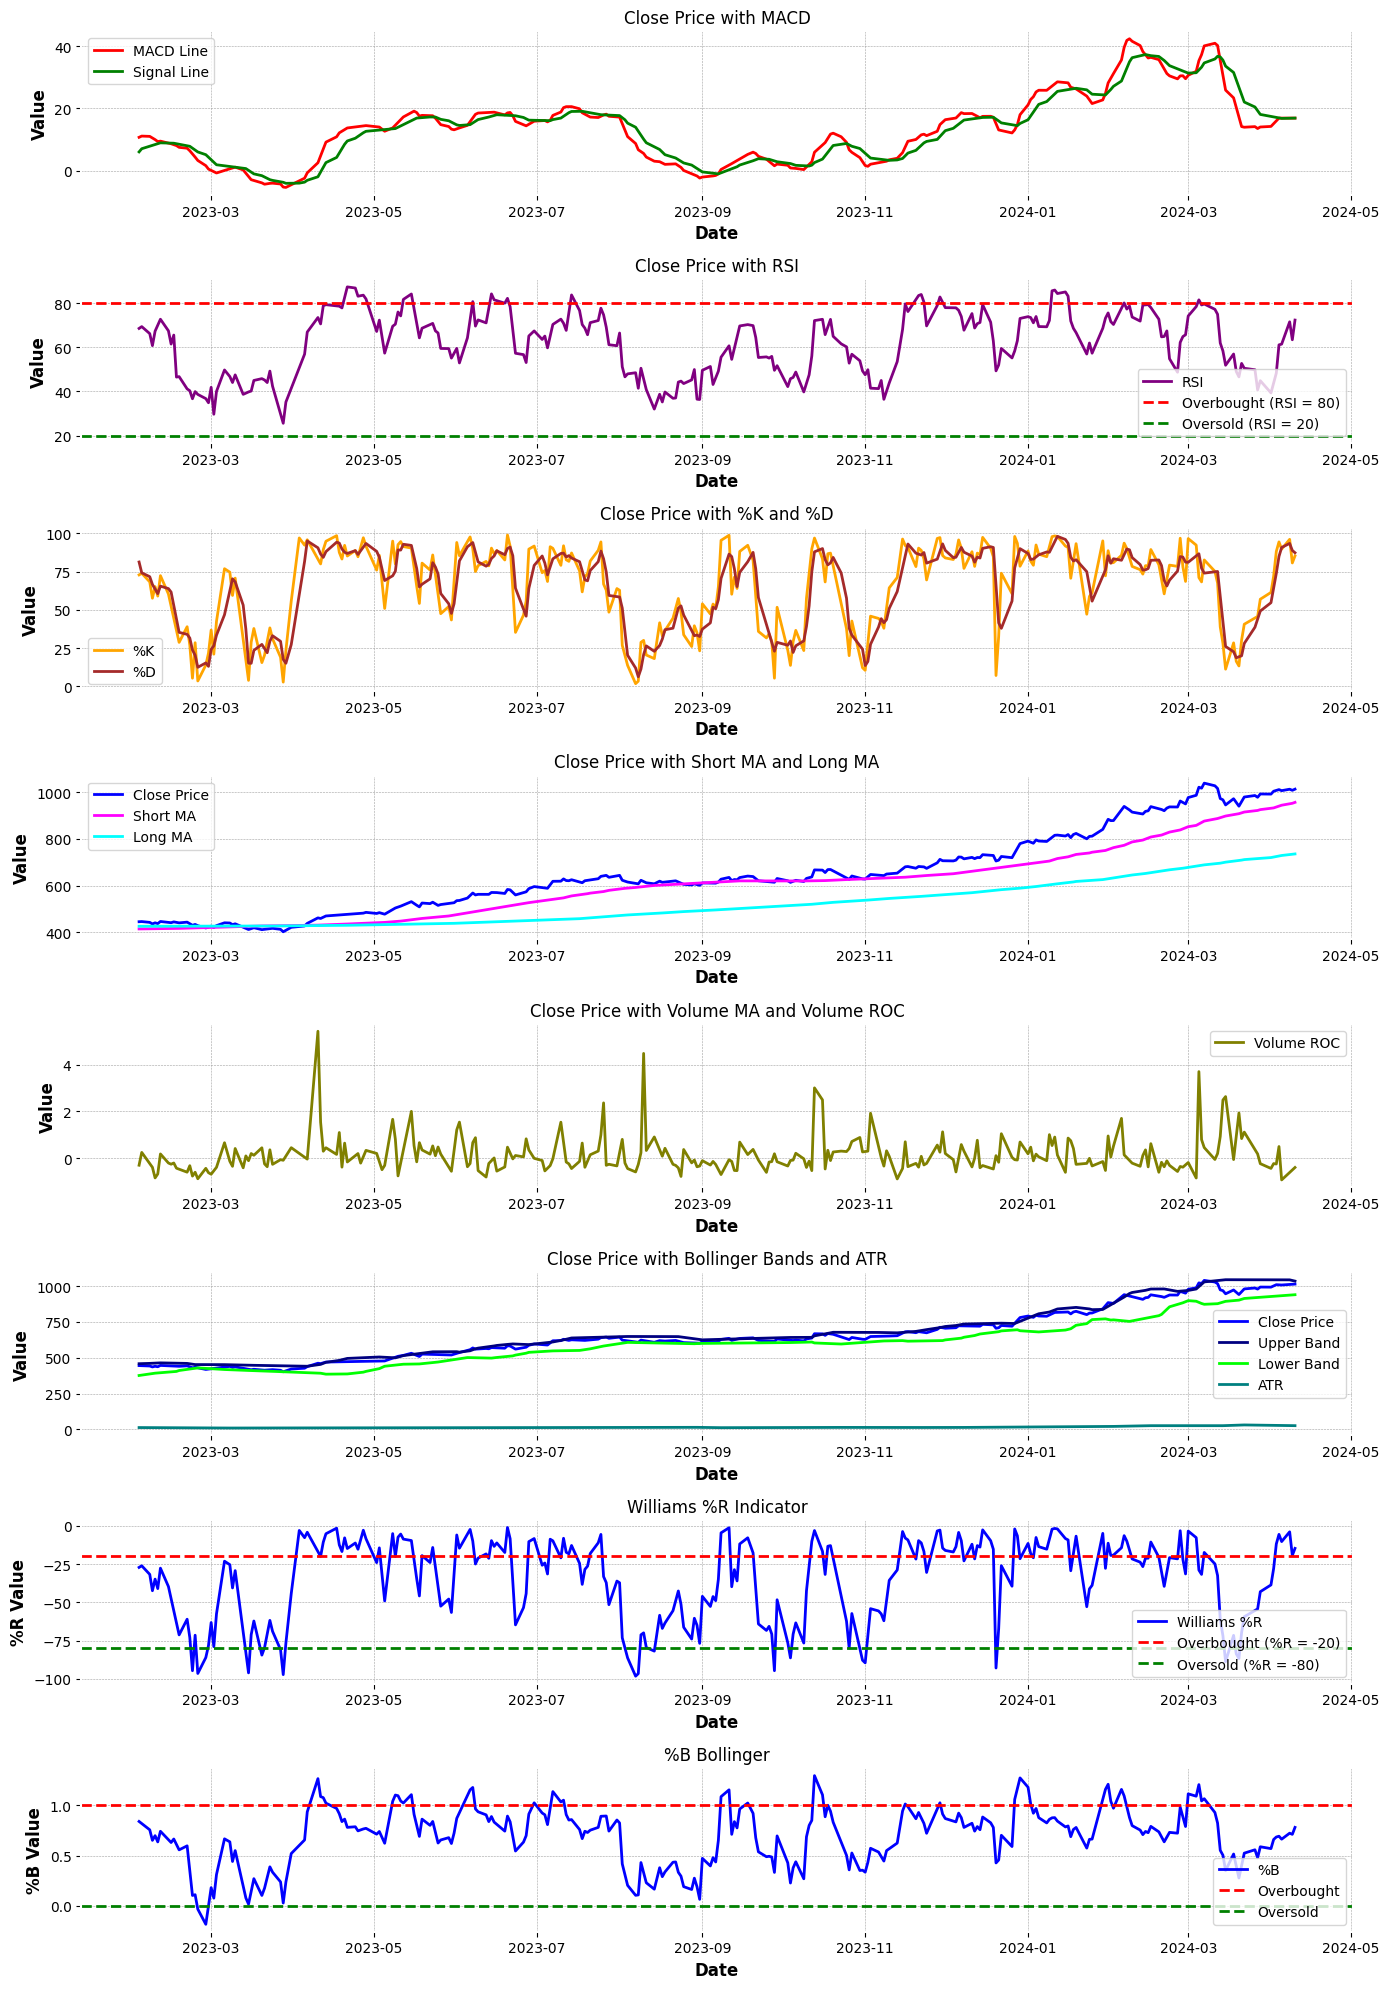

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume 'recent_data' DataFrame contains the necessary columns including Close price and the calculated indicators

# Plotting
fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(14, 20))

# 1) Close price with MACD Line, Signal Line, and MACD Histogram
# axs[0].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[0].plot(recent_data.index, recent_data['MACD_Line'], label='MACD Line', color='red')
axs[0].plot(recent_data.index, recent_data['Signal_Line'], label='Signal Line', color='green')
# axs[0].bar(recent_data.index, recent_data['MACD_Histogram'], label='MACD Histogram', color='gray', alpha=0.5)
axs[0].set_title('Close Price with MACD')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Value')
axs[0].legend()

# 2) Close price with RSI

# axs[1].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[1].plot(recent_data.index, recent_data['RSI'], label='RSI', color='purple')

# Add horizontal lines for overbought and oversold conditions
axs[1].axhline(y=80, color='red', linestyle='--', label='Overbought (RSI = 80)')
axs[1].axhline(y=20, color='green', linestyle='--', label='Oversold (RSI = 20)')

axs[1].set_title('Close Price with RSI')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Value')
axs[1].legend()

# 3) Close price with %K and %D
# axs[2].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[2].plot(recent_data.index, recent_data['%K'], label='%K', color='orange')
axs[2].plot(recent_data.index, recent_data['%D'], label='%D', color='brown')
axs[2].set_title('Close Price with %K and %D')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Value')
axs[2].legend()

# 4) Close price with Short MA and Long MA
axs[3].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[3].plot(recent_data.index, recent_data['Short_MA'], label='Short MA', color='magenta')
axs[3].plot(recent_data.index, recent_data['Long_MA'], label='Long MA', color='cyan')
axs[3].set_title('Close Price with Short MA and Long MA')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Value')
axs[3].legend()

# 5) Close price with Volume MA and Volume ROC
# axs[4].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
# axs[4].plot(recent_data.index, recent_data['Volume_MA'], label='Volume MA', color='pink')
axs[4].plot(recent_data.index, recent_data['Volume_ROC'], label='Volume ROC', color='olive')
axs[4].set_title('Close Price with Volume MA and Volume ROC')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('Value')
axs[4].legend()

# 6) Close price with Upper Band, Lower Band, and ATR
axs[5].plot(recent_data.index, recent_data['Close'], label='Close Price', color='blue')
axs[5].plot(recent_data.index, recent_data['Upper_Band'], label='Upper Band', color='navy')
axs[5].plot(recent_data.index, recent_data['Lower_Band'], label='Lower Band', color='lime')
axs[5].plot(recent_data.index, recent_data['ATR'], label='ATR', color='teal')
axs[5].set_title('Close Price with Bollinger Bands and ATR')
axs[5].set_xlabel('Date')
axs[5].set_ylabel('Value')
axs[5].legend()


# Plotting Williams %R
axs[6].plot(recent_data.index, recent_data['%R'], label='Williams %R', color='blue')
axs[6].axhline(y=-20, color='red', linestyle='--', label='Overbought (%R = -20)')
axs[6].axhline(y=-80, color='green', linestyle='--', label='Oversold (%R = -80)')
axs[6].set_title('Williams %R Indicator')
axs[6].set_xlabel('Date')
axs[6].set_ylabel('%R Value')
axs[6].legend()
# axs[6].grid(True)

# Plotting %B for bollinger bands
axs[7].plot(recent_data.index, recent_data['%B'], label='%B', color='blue')
axs[7].axhline(y=1, color='red', linestyle='--', label='Overbought')
axs[7].axhline(y=0, color='green', linestyle='--', label='Oversold')
axs[7].set_title('%B Bollinger')
axs[7].set_xlabel('Date')
axs[7].set_ylabel('%B Value')
axs[7].legend()

plt.tight_layout()
plt.show()


In [169]:
print(recent_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MACD_Line', 'Signal_Line',
       'MACD_Histogram', 'RSI', '%K', '%D', 'Short_MA', 'Long_MA', 'Volume_MA',
       'Volume_ROC', 'Upper_Band', 'Lower_Band', 'ATR', '%B', '%R', 'pattern',
       'Price_Move_1', 'Next_5_Days_Avg_Diff', 'Price_Move', 'Signal'],
      dtype='object')


cross section for macd and signal line

In [170]:
import pandas as pd
import numpy as np

# Initialize lists to store labels and targets
above_labels = []
below_labels = []
above_targets = []
below_targets = []

for i in range(1, len(recent_data)):
    if recent_data['MACD_Line'][i] > recent_data['Signal_Line'][i] and recent_data['MACD_Line'][i - 1] <= recent_data['Signal_Line'][i - 1]:
        above_labels.append('MACD Line crossed above Signal Line')
        above_targets.append(recent_data['Price_Move'][i])
    elif recent_data['MACD_Line'][i] < recent_data['Signal_Line'][i] and recent_data['MACD_Line'][i - 1] >= recent_data['Signal_Line'][i - 1]:
        below_labels.append('MACD Line crossed below Signal Line')
        below_targets.append(recent_data['Price_Move'][i])



In [171]:
# Filter targets for label 1 occurrences in crosses above
percent_above_label_1 = (above_targets.count(1) / len(above_targets)) * 100
# Filter targets for label -1 occurrences in crosses below
percent_below_label_minus_1 = (below_targets.count(-1) / len(below_targets)) * 100

print(f"Percentage of label 1 occurrences in above target: {percent_above_label_1:.2f}%")
print(f"Percentage of label -1 occurrences in below target: {percent_below_label_minus_1:.2f}%")
print("Number of samples {:.2f}%".format((len(above_targets) + len(below_targets)) / recent_data.shape[0] * 100))


Percentage of label 1 occurrences in above target: 78.57%
Percentage of label -1 occurrences in below target: 40.00%
Number of samples 9.97%


In [172]:
# Define targets for label 1 (Up Wave) and label -1 (Down Wave)
targets = []  # Initialize empty list for targets
for i in range(len(macd_line)):
    if macd_line[i] > signal_line[i]:
        targets.append(1)  # Label 1 for MACD line above signal line (Up Wave)
    elif macd_line[i] < signal_line[i]:
        targets.append(-1)  # Label -1 for MACD line below signal line (Down Wave)
    else:
        targets.append(0)  # Label 0 for no cross

# Filter targets based on whether the MACD line and signal line have crossed or not
not_crossed_targets = [target for target in targets if target == 1 or target == -1]

# Calculate the percentages of label 1 and label -1 occurrences in the filtered targets
percent_label_1 = (not_crossed_targets.count(1) / len(not_crossed_targets)) * 100
percent_label_minus_1 = (not_crossed_targets.count(-1) / len(not_crossed_targets)) * 100

print(f"Percentage of label 1 occurrences when MACD line and signal line do not cross: {percent_label_1:.2f}%")
print(f"Percentage of label -1 occurrences when MACD line and signal line do not cross: {percent_label_minus_1:.2f}%")


Percentage of label 1 occurrences when MACD line and signal line do not cross: 51.21%
Percentage of label -1 occurrences when MACD line and signal line do not cross: 48.79%


rsi value crosschecking

In [173]:
# Initialize counters
overbought_count = 0
oversold_count = 0
total_overbought = 0
total_oversold = 0

# Iterate through the DataFrame
for index, row in recent_data.iterrows():
    if row['RSI'] > 80:
        total_overbought += 1
        if row['Price_Move'] == 1:
            overbought_count += 1
    elif row['RSI'] < 20:
        total_oversold += 1
        if row['Price_Move'] == -1:
            oversold_count += 1

# Calculate percentages
overbought_percentage = (overbought_count / total_overbought) * 100 if total_overbought > 0 else 0
oversold_percentage = (oversold_count / total_oversold) * 100 if total_oversold > 0 else 0

print("Percentage of movement being 1 when RSI is above 80:", overbought_percentage)
print("Percentage of movement being -1 when RSI is below 20:", oversold_percentage)
print("Number of samples: {:.2f}%".format((total_overbought + total_oversold) / recent_data.shape[0] * 100))


Percentage of movement being 1 when RSI is above 80: 53.57142857142857
Percentage of movement being -1 when RSI is below 20: 0
Number of samples: 9.62%


In [174]:
import pandas as pd

# Define the bins for RSI values
bins = [0, 20, 50, 80, 100]

# Define the labels for the bins
labels = ['<20', '20-50', '50-80', '>80']

# Create a new column 'RSI_Bin' to categorize RSI values into bins
recent_data['RSI_Bin'] = pd.cut(recent_data['RSI'], bins=bins, labels=labels, right=False)

# Group by 'RSI_Bin' and calculate the percentage of price movements
percentage_price_move = recent_data.groupby(['RSI_Bin', 'Price_Move']).size() / recent_data.groupby('RSI_Bin').size() * 100

print("Percentage of price movement:")
print(percentage_price_move)


Percentage of price movement:
RSI_Bin  Price_Move
<20      -1                  NaN
          1                  NaN
20-50    -1            35.000000
          1            65.000000
50-80    -1            33.333333
          1            66.666667
>80      -1            46.428571
          1            53.571429
dtype: float64


%k and %d

In [175]:
# Calculate percentage of 1s and -1s when %K is higher than %D and when %K is lower than %D
def calculate_percentage(recent_data):
    bullish_df = recent_data[recent_data['%K'] > recent_data['%D']]

    bullish_percentage = (bullish_df['Price_Move'] == 1).sum() / len(bullish_df) * 100

    # Filter rows where %K is lower than %D
    bearish_df = recent_data[recent_data['%K'] < recent_data['%D']]

    # Calculate percentage of -1s in price_move when %K is lower than %D
    bearish_percentage = (bearish_df['Price_Move'] == -1).sum() / len(bearish_df) * 100
    print("number od samples " + str(len(bullish_df)+len(bearish_df)))
    return bullish_percentage, bearish_percentage

bullish_percentage, bearish_percentage = calculate_percentage(recent_data)
print("Percentage of 1s when %K > %D:", bullish_percentage)
print("Percentage of -1s when %K < %D:", bearish_percentage)


number od samples 291
Percentage of 1s when %K > %D: 65.06849315068493
Percentage of -1s when %K < %D: 35.172413793103445


bollinger band

In [176]:

# Function to analyze the effectiveness of volatility indicators
def analyze_volatility_indicators(data, threshold=15):
   
    upper_band, lower_band, atr, b = calculate_volatility_indicators(data)

    diff_upper = data['Close'] - upper_band.shift(-1)
    diff_lower = lower_band.shift(-1) - data['Close']

    # Check conditions based on the threshold
    condition_1 = diff_upper > threshold
    condition_minus_1 = diff_lower > threshold

    # Count occurrences of 1 and -1 based on conditions
    count_1 = data.loc[condition_1, 'Price_Move'].sum()
    count_minus_1 = data.loc[condition_minus_1, 'Price_Move'].sum()

    total_1 = condition_1.sum()
    total_minus_1 = condition_minus_1.sum()

    percentage_1 = (count_1 / total_1) * 100
    percentage_minus_1 = (count_minus_1 / total_minus_1) * 100

    return percentage_1, percentage_minus_1

# Analyze the effectiveness of volatility indicators
percentage_1, percentage_minus_1 = analyze_volatility_indicators(recent_data)

print(f"Percentage of 1s when price moves above Upper Band: {percentage_1:.2f}%")
print(f"Percentage of -1s when price moves below Lower Band: {percentage_minus_1:.2f}%")

Percentage of 1s when price moves above Upper Band: nan%
Percentage of -1s when price moves below Lower Band: nan%


In [177]:
import pandas as pd
import numpy as np

# Function to generate trading signals and calculate percentages
def generate_signals(data, window=20, deviation=2):

    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + deviation * rolling_std
    lower_band = rolling_mean - deviation * rolling_std


    data['Custom_Signal'] = 0

    for i in range(1, len(data)):
        if data['Close'][i] > upper_band[i-1]:
            data['Custom_Signal'][i] = 1  # Buy signal (price above upper band)
        elif data['Close'][i] < lower_band[i-1]:
            data['Custom_Signal'][i] = -1  # Sell signal (price below lower band)

    total_signals = len(data)
    count_buy_signals = data[data['Custom_Signal'] == 1]['Custom_Signal'].count()
    count_sell_signals = data[data['Custom_Signal'] == -1]['Custom_Signal'].count()
    percentage_buy_signals = (count_buy_signals / total_signals) * 100
    percentage_sell_signals = (count_sell_signals / total_signals) * 100

    return data, percentage_buy_signals, percentage_sell_signals


recent_data, percentage_buy, percentage_sell = generate_signals(recent_data)

print(f"Percentage of Buy Signals (1s): {percentage_buy:.2f}%")
print(f"Percentage of Sell Signals (-1s): {percentage_sell:.2f}%")


Percentage of Buy Signals (1s): 17.87%
Percentage of Sell Signals (-1s): 0.69%


%r

In [178]:
import pandas as pd

# Define the bins for %R Williams values
bins = [-100, -80, -50, -20, 0]

# Define the labels for the bins
labels = ['<-80', '-80 to -50', '-50 to -20', '> -20']

# Create a new column '%R_Bin' to categorize %R Williams values into bins
recent_data['%R_Bin'] = pd.cut(recent_data['%R'], bins=bins, labels=labels, right=False)

# Group by '%R_Bin' and calculate the percentage of price movements
percentage_price_move = recent_data.groupby(['%R_Bin', 'Price_Move']).size() / recent_data.groupby('%R_Bin').size() * 100

print("Percentage of price movement:")
print(percentage_price_move)


Percentage of price movement:
%R_Bin      Price_Move
<-80        -1            19.047619
             1            80.952381
-80 to -50  -1            45.312500
             1            54.687500
-50 to -20  -1            27.368421
             1            72.631579
> -20       -1            38.738739
             1            61.261261
dtype: float64


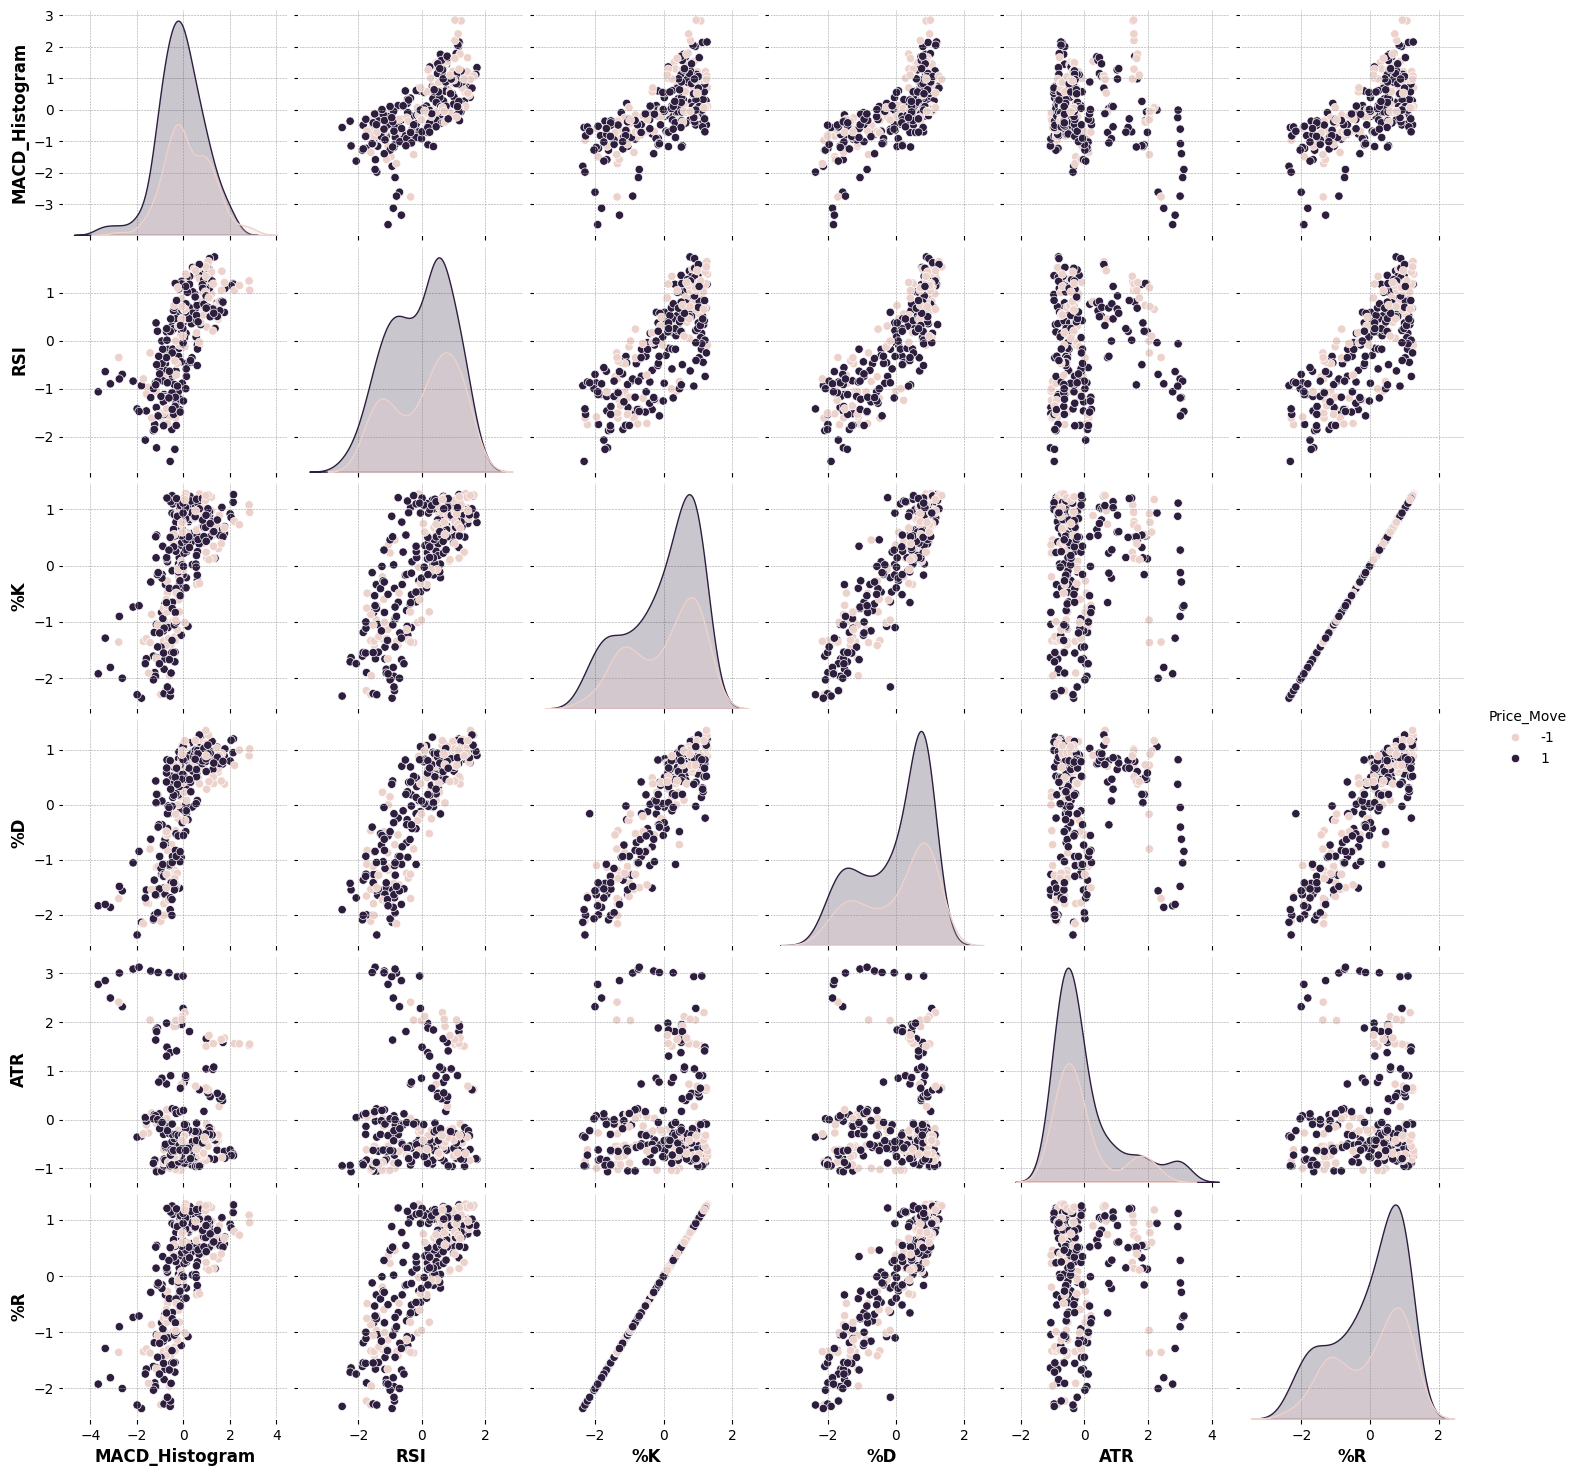

In [179]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Extract the features to be normalized
features_to_normalize = ['MACD_Histogram', 'RSI', '%K', '%D', 'ATR', '%R']

scaler = StandardScaler()

normalized_features = scaler.fit_transform(recent_data[features_to_normalize])

normalized_features = pd.DataFrame(normalized_features, columns= features_to_normalize, index= recent_data.index)

normalized_features['Price_Move'] = recent_data['Price_Move']


sns.pairplot(normalized_features, hue='Price_Move', diag_kind='kde')
plt.show()

In [180]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame containing the features and target variable
X = recent_data.drop(columns=['Price_Move_1', 'Price_Move', 'Next_5_Days_Avg_Diff', '%R_Bin', 'RSI_Bin', 'pattern'])  # Features
y = recent_data[['Price_Move_1']]  # Target variable

feature_names = X.columns.tolist()

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure that 'y' has the same number of rows as 'X'
y = y.iloc[:, 0]  # Choose one of the target variables if they represent the same information

# Initialize Decision Tree classifier
rf = RandomForestClassifier()

# Flatten the target variable if needed (depends on the structure of your data)
y = y.values.ravel()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(fi_df)


           Feature  Importance
20          Signal    0.175534
19              %R    0.089890
9               %K    0.088101
18              %B    0.065228
4           Volume    0.063899
14      Volume_ROC    0.050569
8              RSI    0.042139
7   MACD_Histogram    0.041323
10              %D    0.041098
0             Open    0.034105
17             ATR    0.033358
13       Volume_MA    0.030246
6      Signal_Line    0.030230
5        MACD_Line    0.030148
11        Short_MA    0.028586
2              Low    0.027322
3            Close    0.025372
1             High    0.025047
15      Upper_Band    0.024365
16      Lower_Band    0.024190
12         Long_MA    0.022976
21   Custom_Signal    0.006273


In [181]:
# One-hot encode the "pattern" column
# X = pd.get_dummies(recent_data[features], columns=['pattern'])
unqValues = recent_data["pattern"].unique()
for i in range(len(unqValues)):
    recent_data["pattern"].replace(unqValues[i], i, inplace= True)

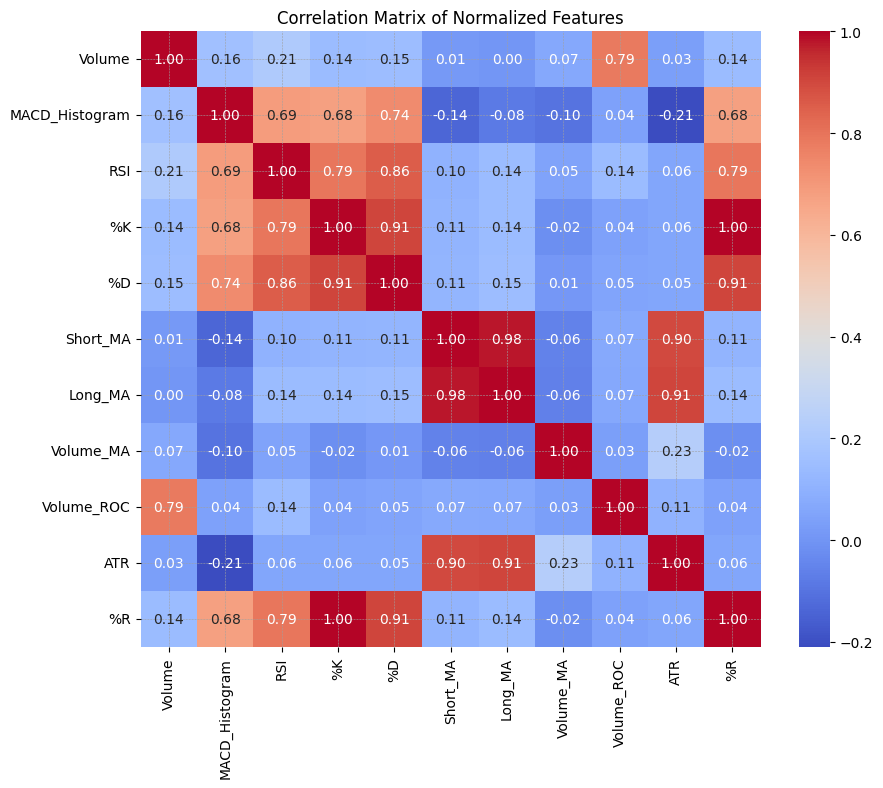

In [182]:
# Compute the correlation matrix
data_corr=recent_data[['Volume', 'MACD_Histogram', 'RSI', '%K', '%D', 'Short_MA', 'Long_MA', 'Volume_MA',
       'Volume_ROC', 'ATR', '%R']]
# non_tar_data=data_corr.drop('Price_Move',axis=1)
correlation_matrix = data_corr.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Normalized Features')
plt.show()


### Classifier

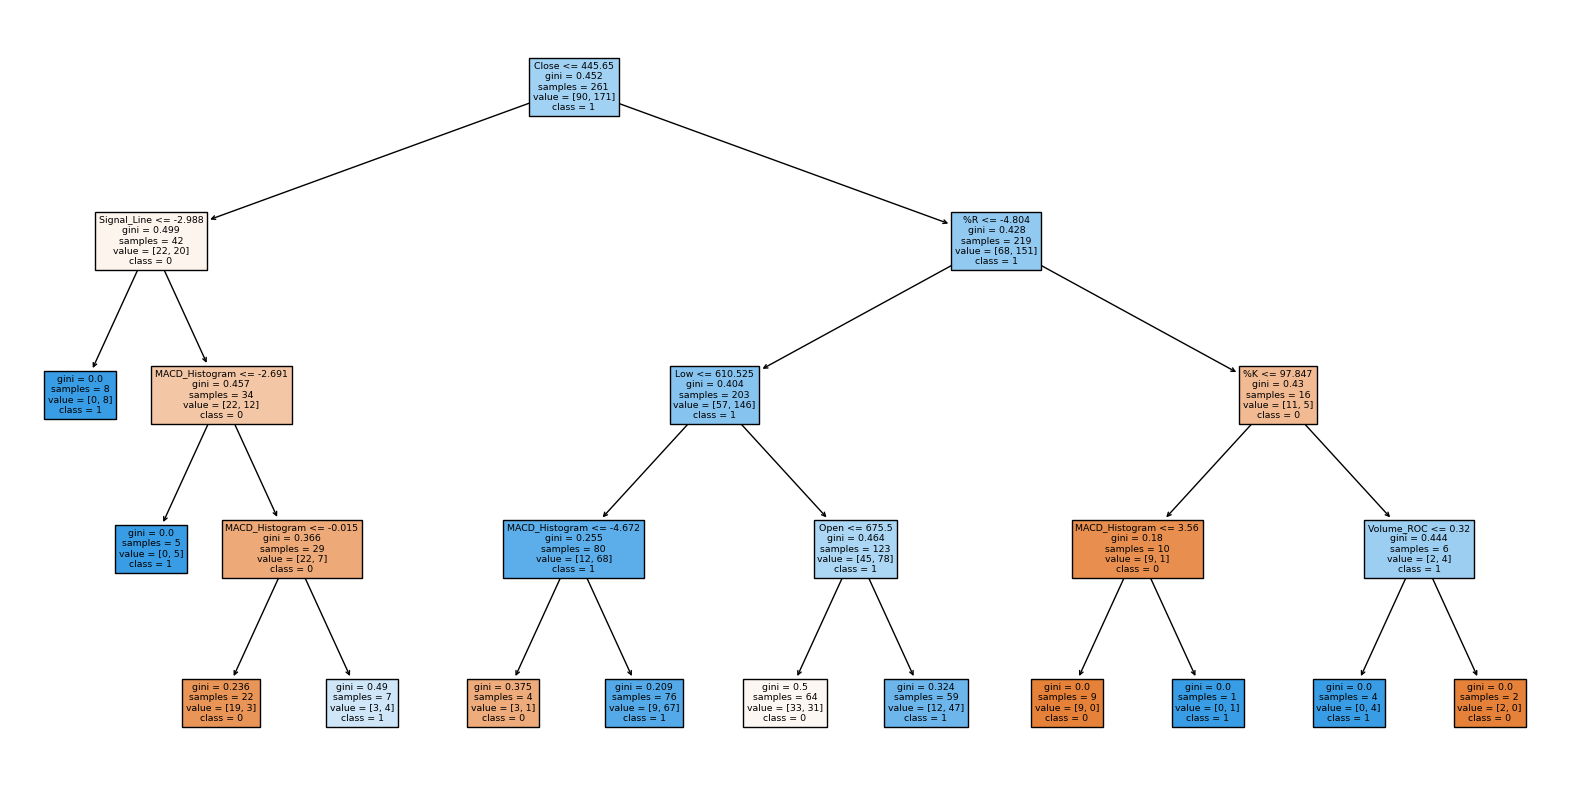

[ 7  8  9 10 11 13 14 21 26 27 28]


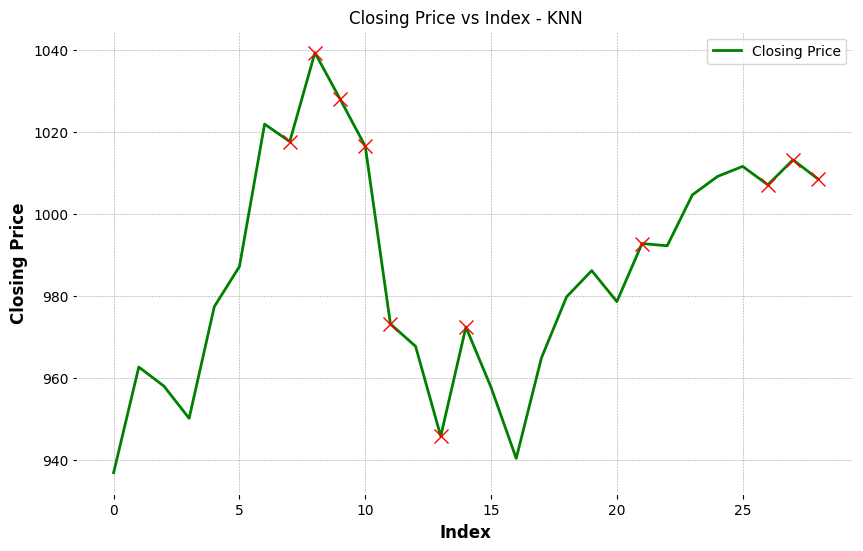

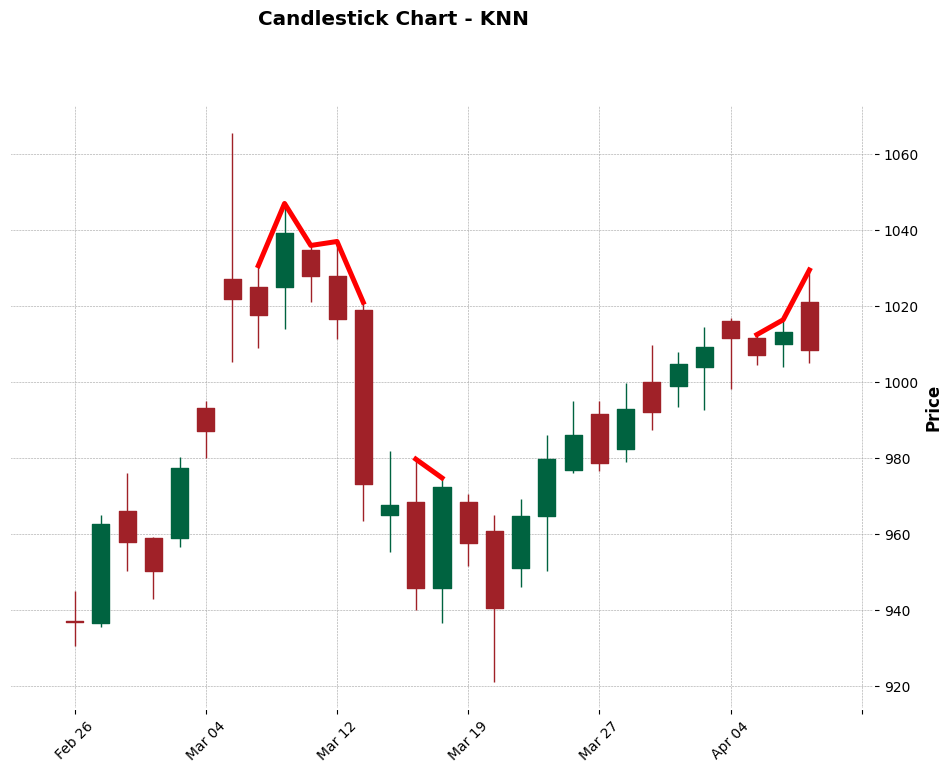

[ 5  6  7  8  9 10 11 13 26 27 28]


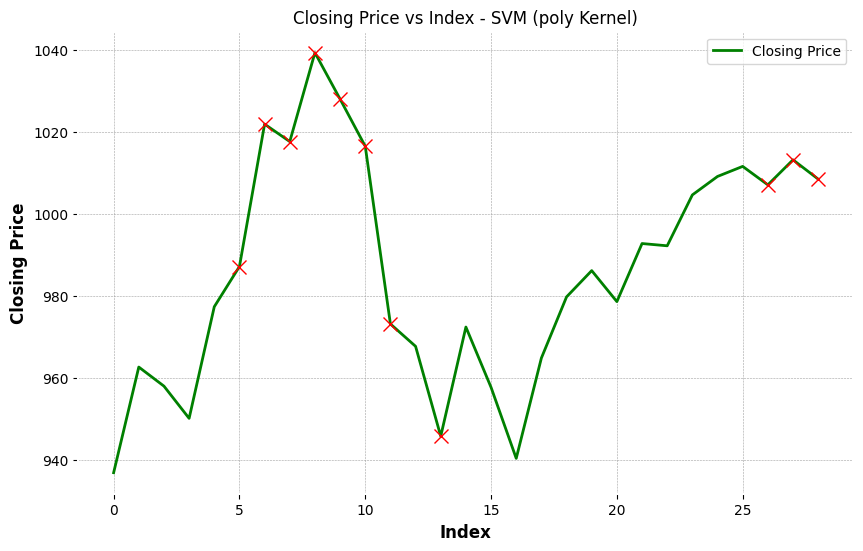

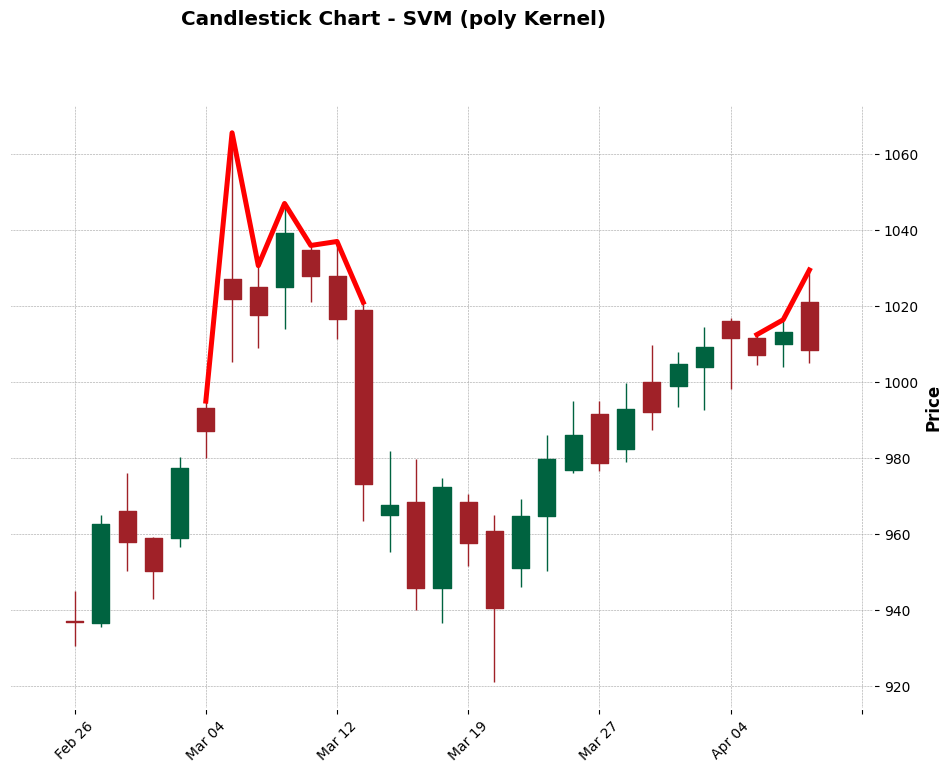

[ 5  6  7  8  9 10 11 13 26 27 28]


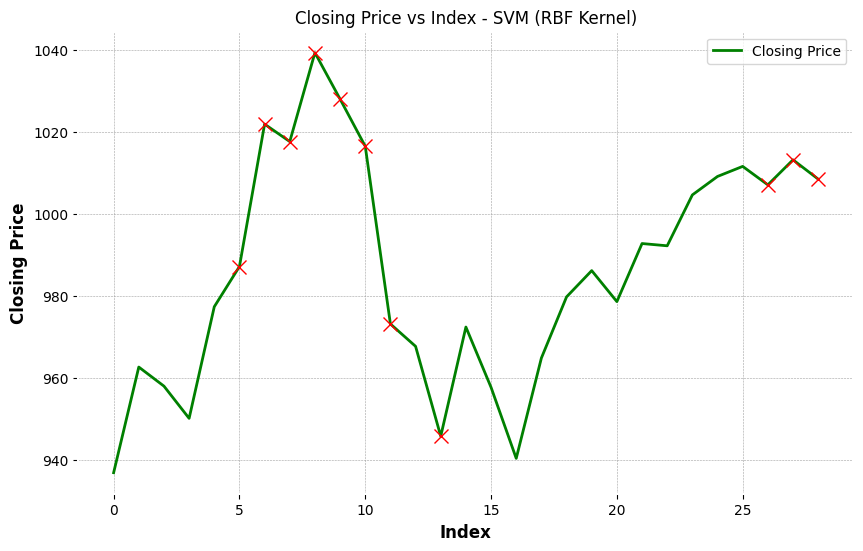

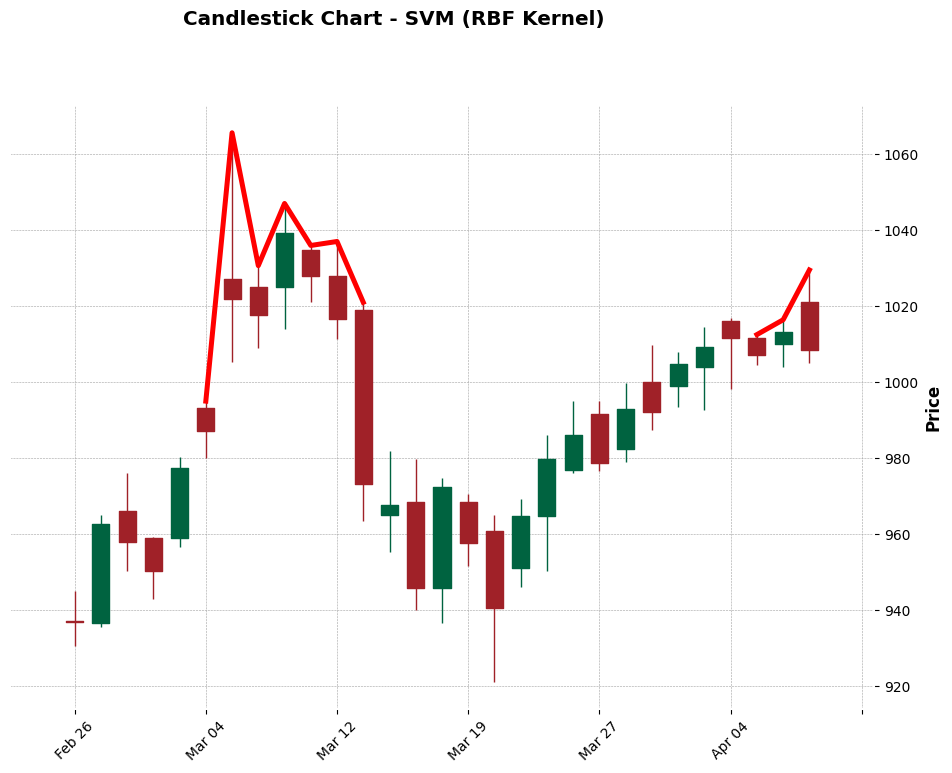

[ 0  1  6  8 13 15 20 22 24 27]


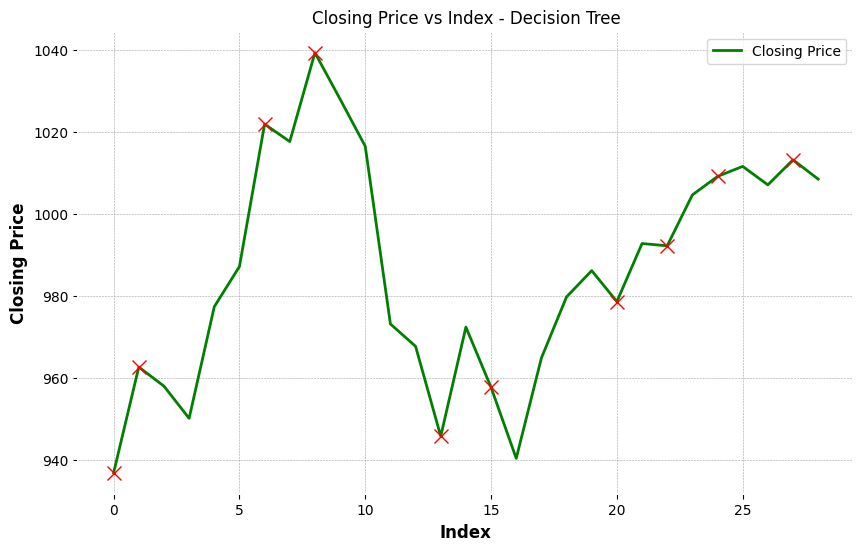

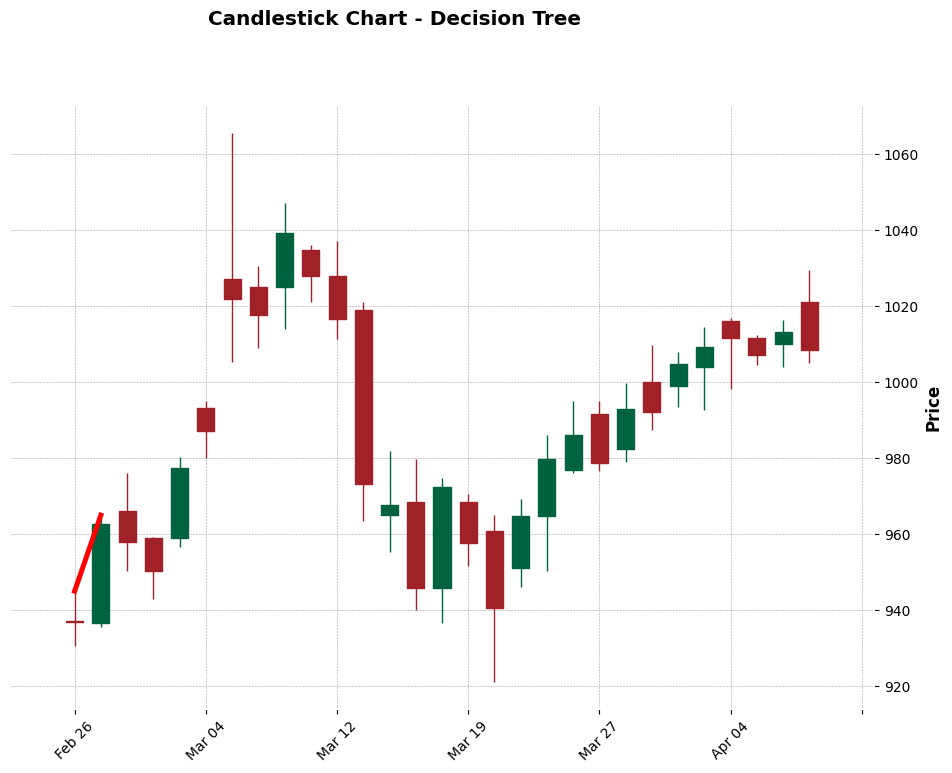

[ 1  3  4  6  7  8  9 10 11 14 15 17 19 23 25 26 27 28]


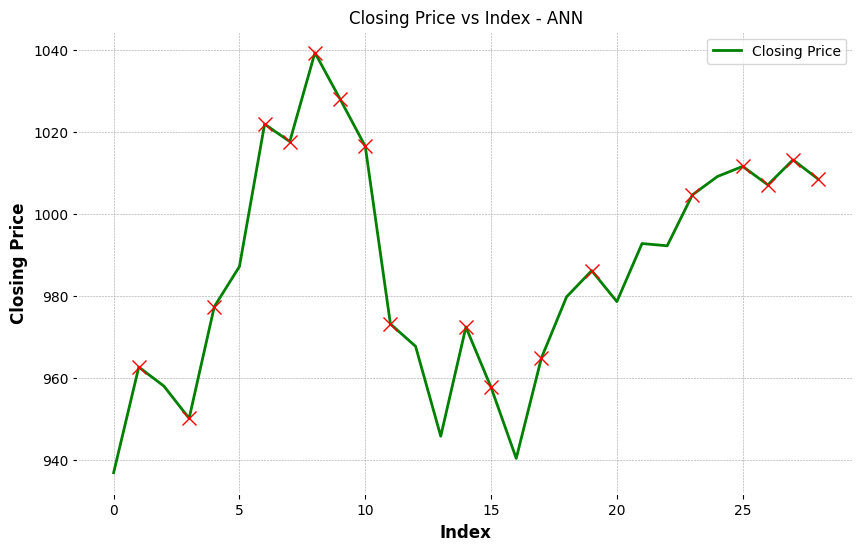

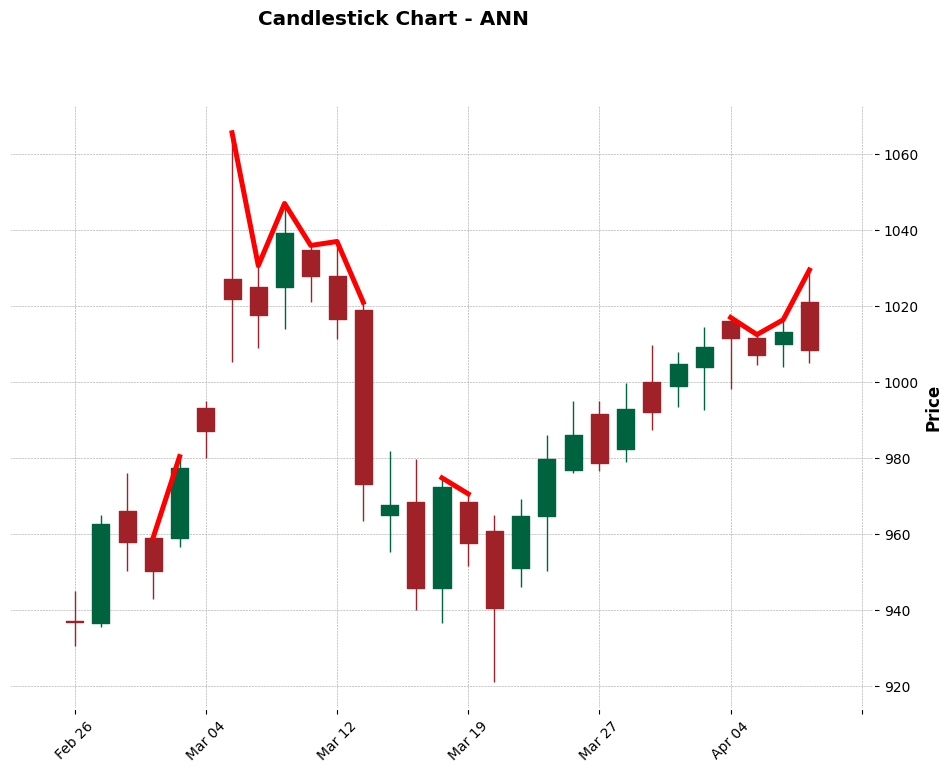

[ 5  7  8  9 10 11 12 26 27 28]


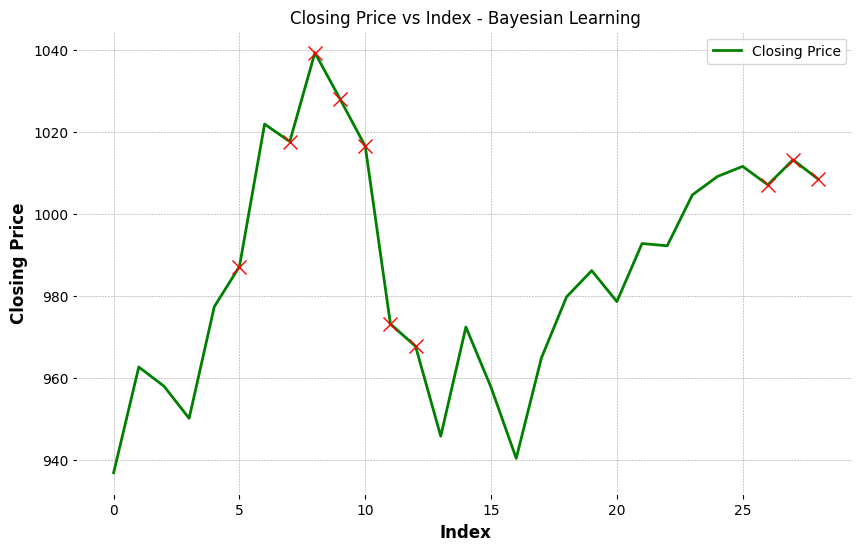

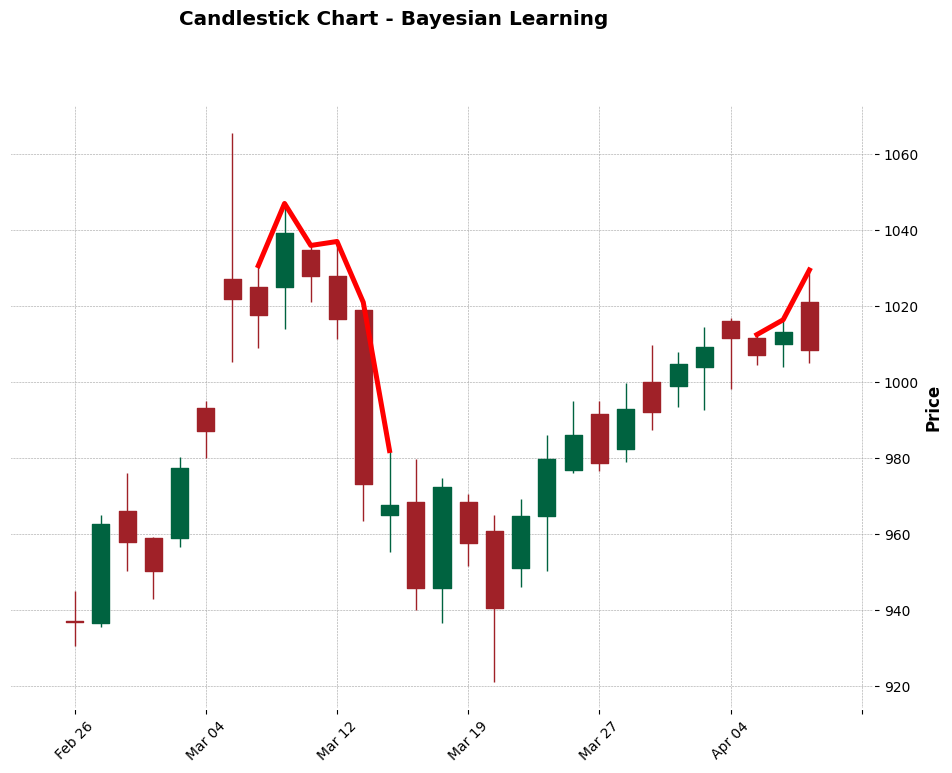

[ 0  5  7  8 11 13 14 15 17 19 25 26 27 28]


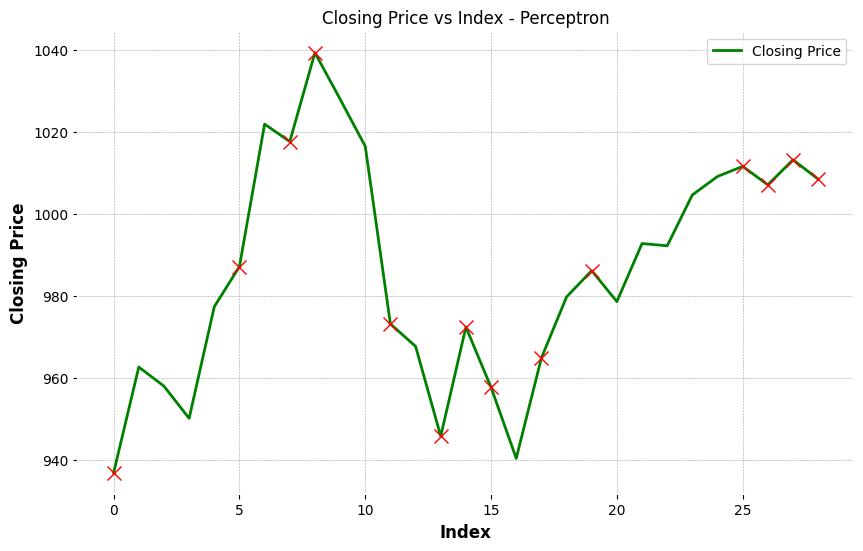

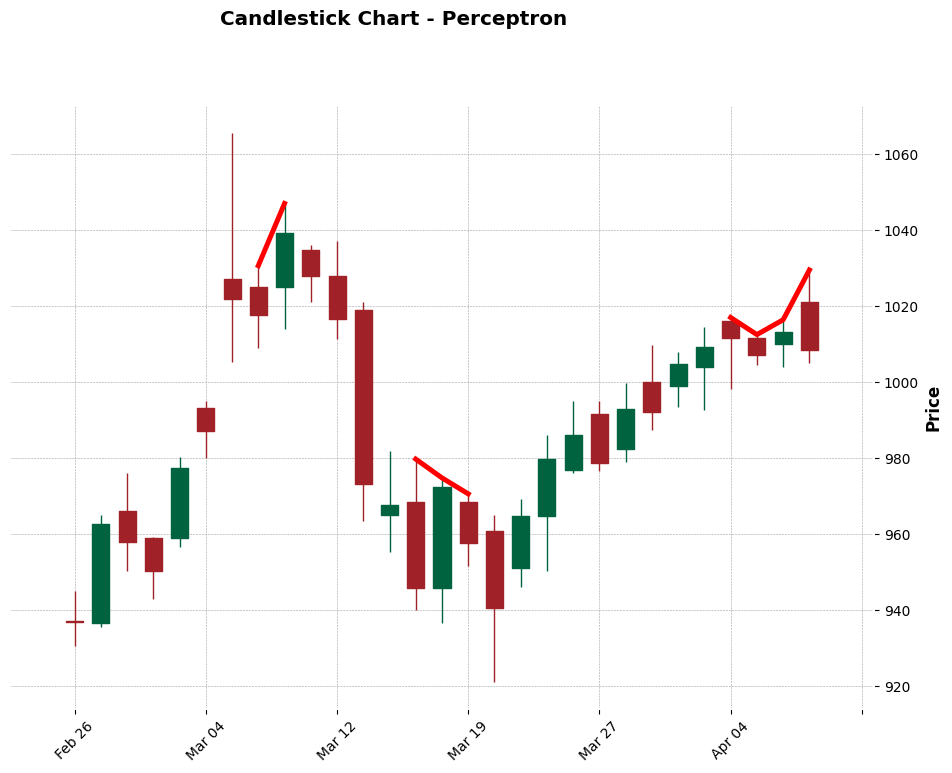

[ 5  6  7  8  9 10 11 13 26 27 28]


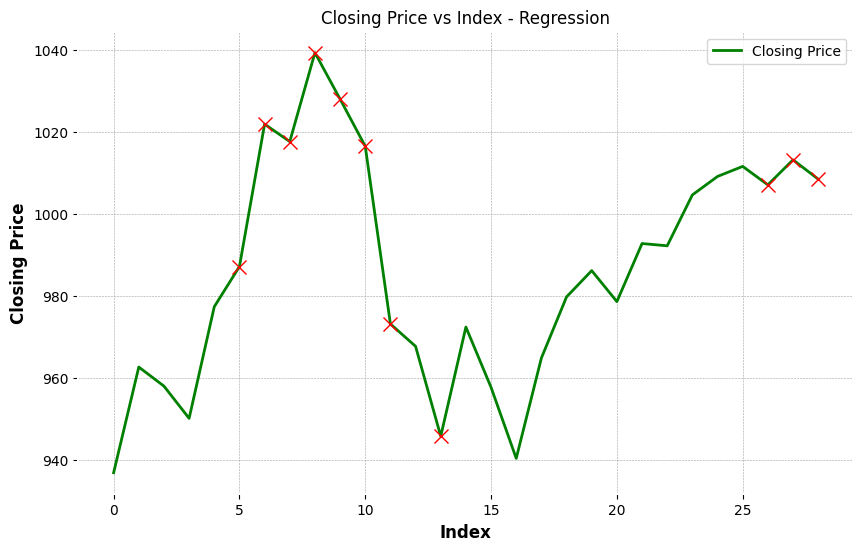

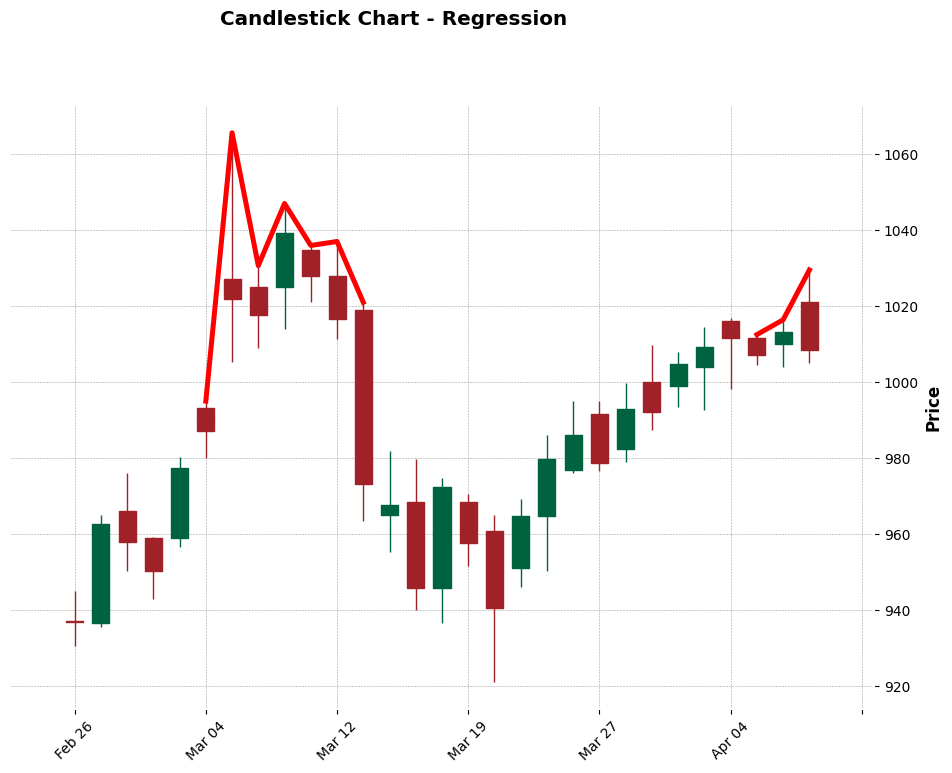

[ 1  5 12 13 15 26]


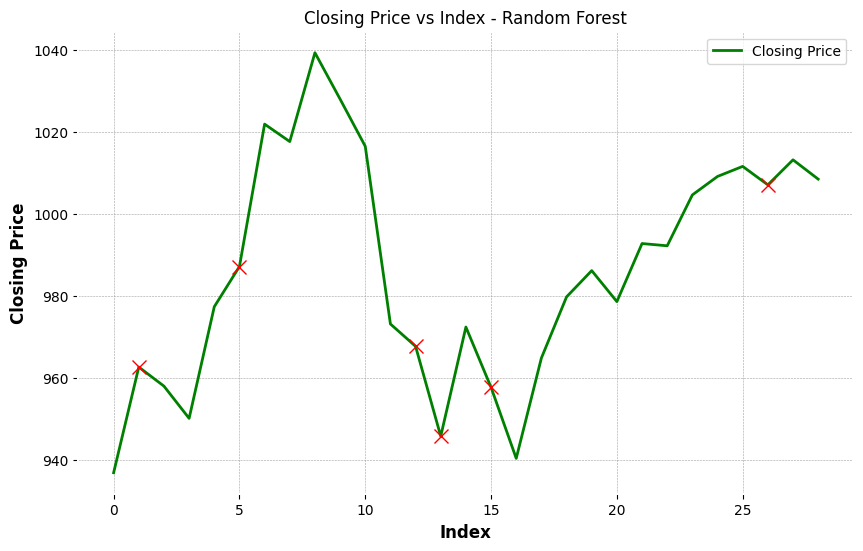

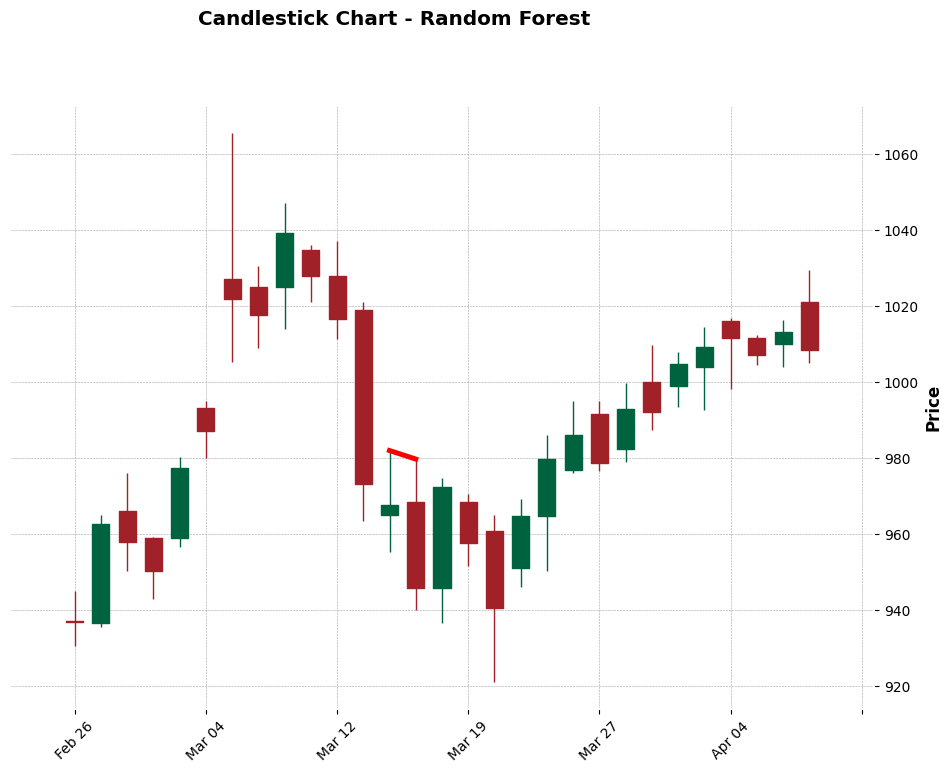

[ 9 10 13 15 26]


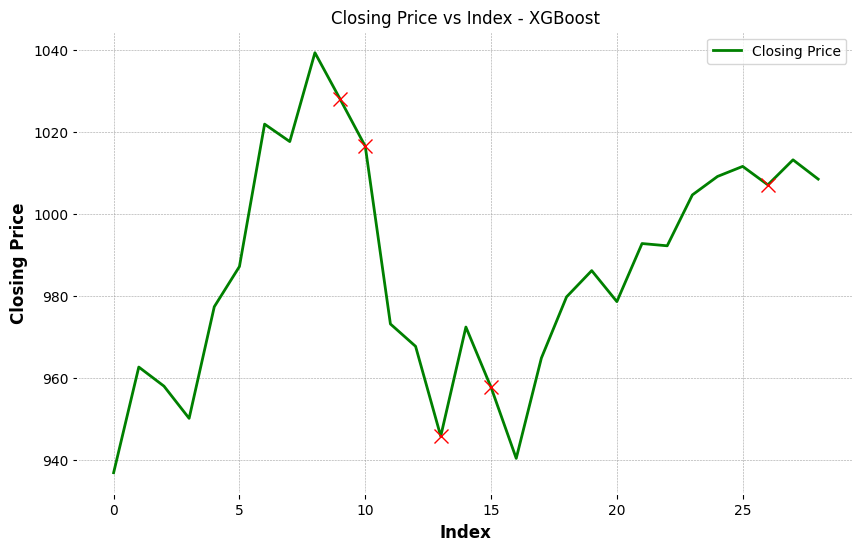

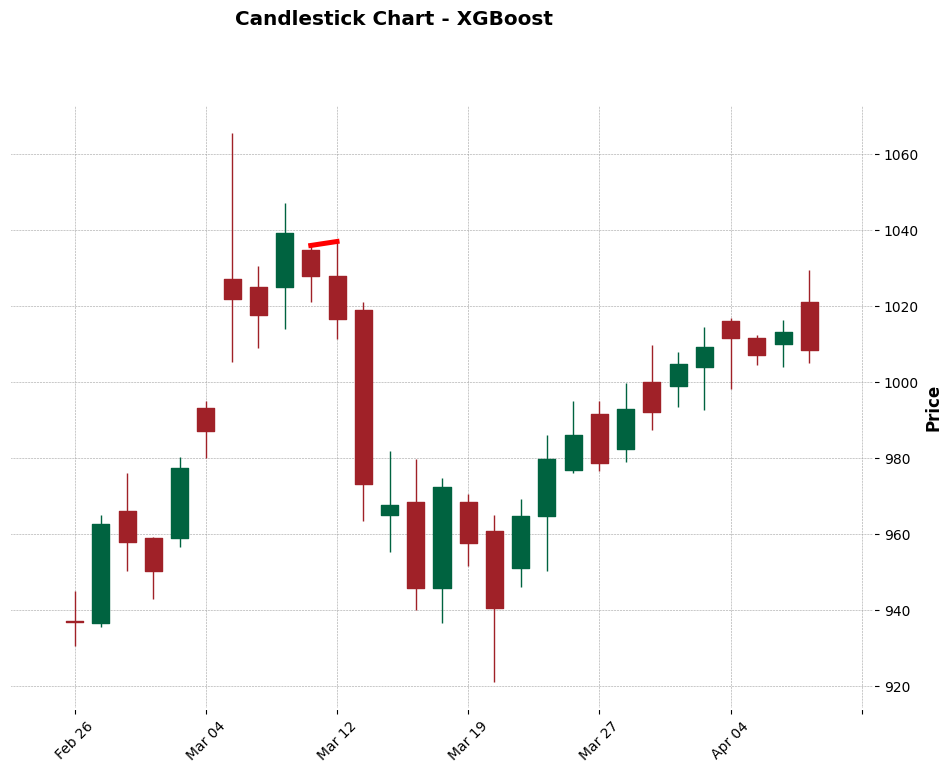

[ 5  9 11 13 15 22 26]


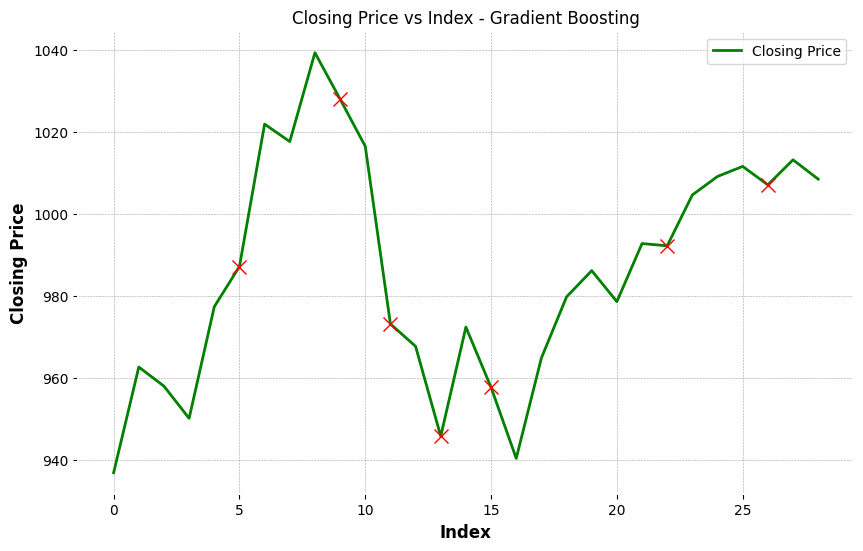

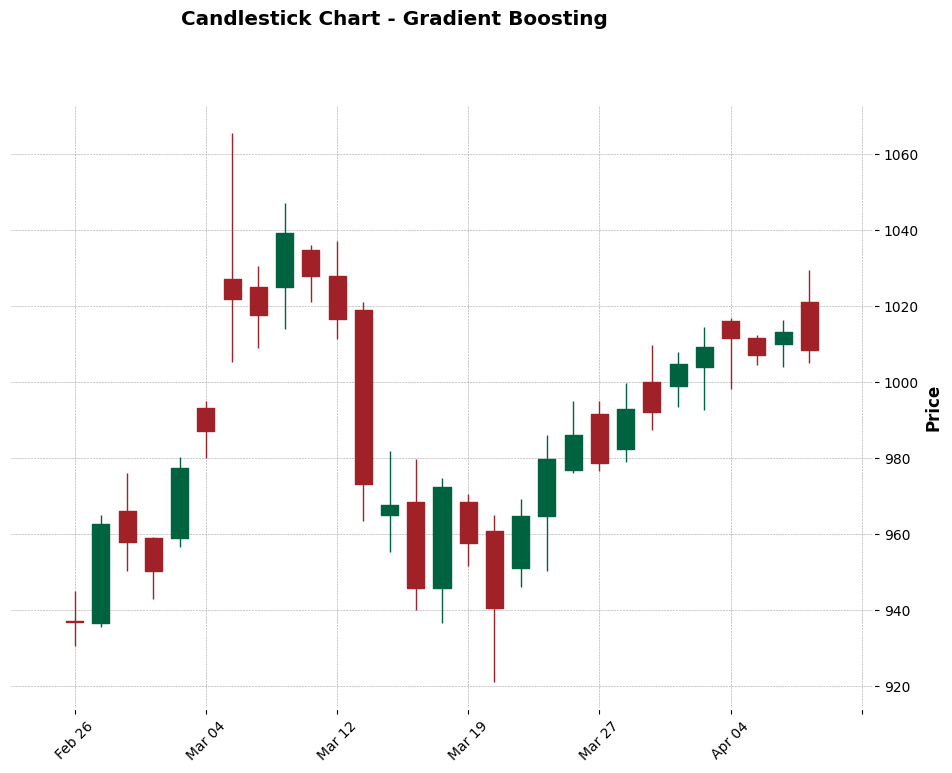

Performance Metrics:
KNN: {'Accuracy': 0.6206896551724138, 'Precision': 0.7913618948101706, 'Recall': 0.6206896551724138, 'F1-score': 0.678321304464047}
SVM (poly Kernel): {'Accuracy': 0.6206896551724138, 'Precision': 1.0, 'Recall': 0.6206896551724138, 'F1-score': 0.7659574468085107}
SVM (RBF Kernel): {'Accuracy': 0.6206896551724138, 'Precision': 1.0, 'Recall': 0.6206896551724138, 'F1-score': 0.7659574468085107}
Decision Tree: {'Accuracy': 0.6551724137931034, 'Precision': 0.6530825496342737, 'Recall': 0.6551724137931034, 'F1-score': 0.6509465855307641}
ANN: {'Accuracy': 0.3793103448275862, 'Precision': 0.3793103448275862, 'Recall': 0.3793103448275862, 'F1-score': 0.3793103448275862}
Bayesian Learning: {'Accuracy': 0.6551724137931034, 'Precision': 0.8655520724486242, 'Recall': 0.6551724137931034, 'F1-score': 0.7223466188983431}
Perceptron: {'Accuracy': 0.5172413793103449, 'Precision': 0.5444096133751305, 'Recall': 0.5172413793103449, 'F1-score': 0.5286751361161525}
Regression: {'Accurac

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

features = ['MACD_Histogram', 'RSI', '%K', '%D', '%R',"pattern","%B","Signal_Line","Volume_ROC","Volume",'Open', 'High', 'Low', 'Close'] 

X = recent_data[features]
y = recent_data['Price_Move']


# # Standardize selected features
# features_to_standardize = ['MACD_Histogram', 'RSI', '%K', '%D', '%R',"ATR","Lower_Band","Upper_Band","Long_MA","Short_MA","Signal_Line","Signal_Line"]
# scaler = StandardScaler()
# X_scaled = X.copy()  # Make a copy of X to avoid modifying the original data
# X_scaled[features_to_standardize] = scaler.fit_transform(X_scaled[features_to_standardize])

# Normalize selected features
# features_to_normalize = ['MACD_Histogram', 'RSI', '%K', '%D', '%R',"ATR","Lower_Band","Upper_Band","Long_MA","Short_MA","Signal_Line","Signal_Line"]
# scaler = MinMaxScaler()
# X_normalized = X.copy()  # Make a copy of X to avoid modifying the original data
# X_normalized[features_to_normalize] = scaler.fit_transform(X_normalized[features_to_normalize])

# Function to flatten a list of arrays into a one-dimensional array
def flatten_list_of_arrays(lst):
    return np.concatenate(lst).ravel()

# Function to plot actual vs predicted points with closing price on the y-axis
def plot_actual_vs_predicted_with_price(X_test, y_test, pred, closing_prices, title,name):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Closing Price / Price Move")    
    # Plot the closing prices
    plt.plot(range(len(X_test)), closing_prices, label='Closing Price', color='green')
    incorrect_indices = np.where(y_test != pred)[0]
    print(incorrect_indices)
    # Plotting incorrect indices
    for idx in incorrect_indices:
        plt.plot(idx, closing_prices[idx], marker='x', markersize=10, color='red')#, label='Incorrect'
    plt.xlabel('Index')
    plt.ylabel('Closing Price')
    plt.title('Closing Price vs Index'+ " - "+ name)
    plt.legend()
    plt.show()
    # Plot candlestick chart
    ohlc = X_test[['Open', 'High', 'Low', 'Close']].reset_index()
    ohlc.columns = ['Date', 'Open', 'High', 'Low', 'Close']
    ohlc['Date'] = pd.to_datetime(ohlc['Date'])
    ohlc.set_index('Date', inplace=True)    
    # Create a copy of ohlc for annotations
    ohlc_annotated = ohlc.copy()
    # Add incorrect prediction markers to the copy
    incorrect_indices = np.where(y_test != pred)[0]
    for idx in incorrect_indices:
        date = ohlc_annotated.index[idx]
        high = ohlc_annotated.loc[date, 'High']
        ohlc_annotated.loc[date, 'Incorrect'] = high    
    # Plot candlestick chart with incorrect predictions annotated
    mpf.plot(ohlc, type='candle', title='Candlestick Chart - ' + name, style='charles', figscale=1.5,
             addplot=mpf.make_addplot(ohlc_annotated['Incorrect'], marker='x', markersize=100, color='red'))

    plt.show()

slice_index=-30
y[y == -1] = 0

# Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVM (poly Kernel)": SVC(kernel='poly'),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),  # Specify kernel as 'rbf' for RBF kernel
    "Decision Tree": DecisionTreeClassifier(),
    "ANN": MLPClassifier(),
    "Bayesian Learning": GaussianNB(),
    "Perceptron": Perceptron(),
    "Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),  # Added Random Forest
    "XGBoost": XGBClassifier(),  # Added XGBoost
    "Gradient Boosting": GradientBoostingClassifier(),  # Add Gradient Boosting Classifier
}

#ploting Decition Tree
X_train, X_test = X[:slice_index], X[slice_index:-1]
y_train, y_test = y[1:slice_index+1], y[slice_index+1:]
# Create and fit the Decision Tree model
dt_classifier = DecisionTreeClassifier(max_depth=4)
dt_classifier.fit(X_train, y_train)
# Convert index object to a list
feature_names_list = list(X_train.columns)
# Convert array to a list
class_names_list = list(dt_classifier.classes_)
# Convert array to a list of strings
class_names_list = [str(class_) for class_ in dt_classifier.classes_]
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=feature_names_list, class_names=class_names_list, filled=True)
plt.show()

results = {}

for name, clf in classifiers.items():
    X_train, X_test = X[:slice_index], X[slice_index:-1]
    y_train, y_test = y[1:slice_index+1], y[slice_index+1:]
    
    clf.fit(X_train, y_train)
    pred = []
    for i in range(int(len(X_test))):
        # x_test_instance = X_test[i].reshape(1, -1)        #Convert DataFrame row to numpy array
        x_test_instance = X_test.iloc[i].values.reshape(1, -1)        #Convert DataFrame row to numpy array
        # y_test_instance = y_test.iloc[i].values.reshape(1, -1)
        spred = clf.predict(x_test_instance)
        pred.append(spred)
        X_train = np.append(X_train, x_test_instance, axis=0)
        y_train = np.append(y_train, y_test[i])
        clf.fit(X_train,y_train)

    plot_actual_vs_predicted_with_price(X_test, y_test, flatten_list_of_arrays(pred), X_test['Close'], "Actual vs Predicted Price Move with Closing Price",name)      


    accuracy = accuracy_score(pred,y_test)
    precision = precision_score(pred,y_test, average='weighted')
    recall = recall_score(pred,y_test, average='weighted')
    f1 = f1_score(pred,y_test, average='weighted')
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

print("Performance Metrics:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")





In [184]:
from tabulate import tabulate

# Print results in a table
table_headers = ["Classifier", "Accuracy", "Precision", "Recall", "F1-score"]
table_data = []

for name, metrics in results.items():
    table_data.append([name, metrics["Accuracy"], metrics["Precision"], metrics["Recall"], metrics["F1-score"]])

print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))


+-------------------+--------------------+--------------------+--------------------+--------------------+
|    Classifier     |      Accuracy      |     Precision      |       Recall       |      F1-score      |
+-------------------+--------------------+--------------------+--------------------+--------------------+
|        KNN        | 0.6206896551724138 | 0.7913618948101706 | 0.6206896551724138 | 0.678321304464047  |
| SVM (poly Kernel) | 0.6206896551724138 |        1.0         | 0.6206896551724138 | 0.7659574468085107 |
| SVM (RBF Kernel)  | 0.6206896551724138 |        1.0         | 0.6206896551724138 | 0.7659574468085107 |
|   Decision Tree   | 0.6551724137931034 | 0.6530825496342737 | 0.6551724137931034 | 0.6509465855307641 |
|        ANN        | 0.3793103448275862 | 0.3793103448275862 | 0.3793103448275862 | 0.3793103448275862 |
| Bayesian Learning | 0.6551724137931034 | 0.8655520724486242 | 0.6551724137931034 | 0.7223466188983431 |
|    Perceptron     | 0.5172413793103449 | 0.5

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [3, 5, 7],
    'max_depth': np.logspace(1, 10, num=5, dtype=int),  # Generate 5 integer values between 1 and 100
    'min_samples_split': [2, 5]
}
slice_index = -20

# Initialize lists to store predictions and performance metrics
pred_rf = []
accuracy_rf = []
precision_rf = []
recall_rf = []
f1_rf = []
best_accuracy = -1
best_params = None

# Perform Grid Search with Cross-Validation
for i in range(len(X_test)):
    X_train, X_test = X[:slice_index], X[slice_index:-1]
    y_train, y_test = y[1:slice_index+1], y[slice_index+1:]
    grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
    grid_search_rf.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params_rf = grid_search_rf.best_params_
    best_score_rf = grid_search_rf.best_score_

    # Check if current accuracy is the best
    if best_score_rf > best_accuracy:
        best_accuracy = best_score_rf
        best_params = best_params_rf

    # Initialize the best Random Forest classifier with the best parameters
    best_rf_classifier = RandomForestClassifier(**best_params_rf)
    best_rf_classifier.fit(X_train, y_train)

    # Predict
    pred_rf.append(best_rf_classifier.predict(X_test))

    # Evaluate the best Random Forest classifier
    accuracy_rf.append(accuracy_score(pred_rf[-1], y_test))
    precision_rf.append(precision_score(pred_rf[-1], y_test, average='weighted'))
    recall_rf.append(recall_score(pred_rf[-1], y_test, average='weighted'))
    f1_rf.append(f1_score(pred_rf[-1], y_test, average='weighted'))

    # Update training data for the next iteration
    X_train = np.append(X_train, [X_test.iloc[i % len(X_test)]], axis=0)
    y_train = np.append(y_train, y_test[i])

print("Average Accuracy for Random Forest:", np.max(accuracy_rf))
print("Average Precision for Random Forest:", np.max(precision_rf))
print("Average Recall for Random Forest:", np.max(recall_rf))
print("Average F1-score for Random Forest:", np.max(f1_rf))
print("Best parameters for highest accuracy:", best_params)
# Print the average results
print("Average Accuracy for Random Forest:", np.mean(accuracy_rf))
print("Average Precision for Random Forest:", np.mean(precision_rf))
print("Average Recall for Random Forest:", np.mean(recall_rf))
print("Average F1-score for Random Forest:", np.mean(f1_rf))


Average Accuracy for Random Forest: 0.8421052631578947
Average Precision for Random Forest: 0.951417004048583
Average Recall for Random Forest: 0.8421052631578947
Average F1-score for Random Forest: 0.8463583200425305
Best parameters for highest accuracy: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 3}
Average Accuracy for Random Forest: 0.6952908587257617
Average Precision for Random Forest: 0.818417501242986
Average Recall for Random Forest: 0.6952908587257617
Average F1-score for Random Forest: 0.7095791055763073


printing the movement for next trading day

In [190]:
# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train[:-1], y_train[1:])

# Predict the movement for the next trading day
y_next = rf_classifier.predict(X_train[-1].reshape(1, -1))
print("The movement for the next trading day may be:", y_next) #y_next==1 upward , y_next==0 downward.


The movement for the next trading day may be: [0]


In [191]:
# Reset warnings to default behavior
warnings.resetwarnings()